In [160]:
import requests
import json
import pandas as pd

In [161]:
%matplotlib inline

### Percent of COVID-19 tests positive by date,
### from Ohio CDC data.  (outliers and null rejected)

In [175]:
state='OH'

<ipython-input-176-835104559509>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['percentPositive'] = df2['percentPositive'].abs()*100


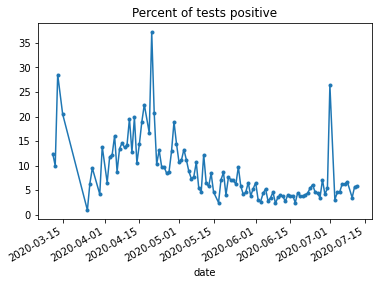

In [176]:
result = requests.get("https://covidtracking.com/api/states/daily")
data = json.loads(result.content)
df = pd.DataFrame([ d for d in data if d['state']==state])
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
df = df.set_index('date')

df['percentPositive'] =  df.positiveIncrease / df.totalTestResultsIncrease

notNullorOneorZero =  ~df['percentPositive'].isnull() & (df['percentPositive']!=1) & (df['percentPositive']!=0)
notTooBig = ~(df['percentPositive'] > .5)

df2 = df[ notNullorOneorZero & notTooBig ] 

df2['percentPositive'] = df2['percentPositive'].abs()*100
#df_percent = df2.loc[:,'percentPositive']
a1 = df2.percentPositive.plot(marker='.',title='Percent of tests positive')
a1.figure.savefig('percent',dpi=100)

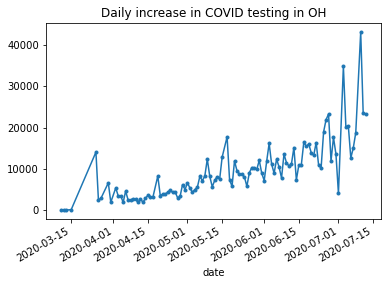

In [178]:
a2 = df2.totalTestResultsIncrease.plot(marker='.',title=f'Daily increase in COVID testing in {state}')
a2.figure.savefig('testing',dpi=100)

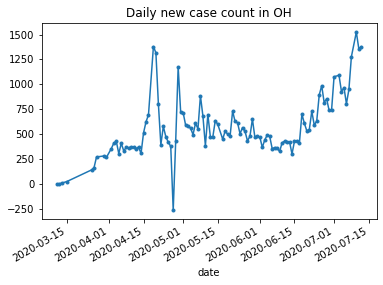

In [182]:
a3 = df2.positiveIncrease.plot(marker='.',title=f'Daily new case count in {state}')
a2.figure.savefig('new_cases',dpi=100)

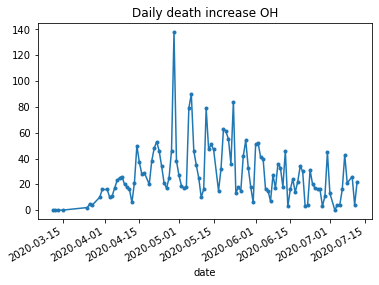

In [185]:
a4 = df2.deathIncrease.plot(marker='.',title=f'Daily death increase {state}')
a4.figure.savefig('daily_deaths',dpi=100)

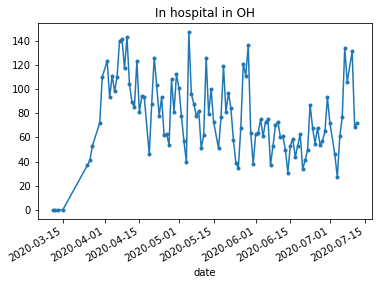

In [184]:
a4 = df2.hospitalizedIncrease.plot(marker='.',title=f'In hospital in {state}')
a4.figure.savefig('in_hospital',dpi=100)